# Import Libraries, Loading & Preparing data

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# Load themnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape,"x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,) x_test shape: (10000, 28, 28) y_test shape: (10000,)


In [3]:
np.random.seed(0)

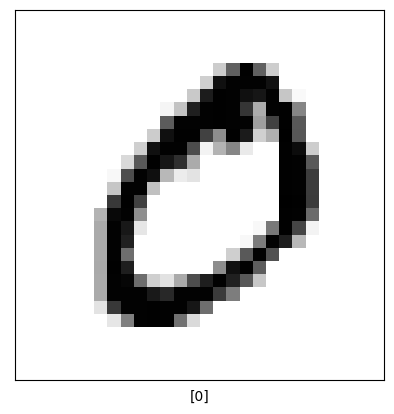

In [4]:
# Show one of the images from the training dataset
plt.xticks([])
plt.yticks([])
plt.xlabel([y_train[1]])
plt.imshow(x_train[1],cmap=plt.cm.binary)

In [5]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


# Define the CNN Model

In [6]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()


C:\Users\HARSHAL\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 32)          │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         401,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 412,778 (1.57 MB)

 Trainable params: 412,778 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


In [8]:
x_train = x_train.reshape(-1,28, 28,1)#Reshape for CNN
x_test = x_test.reshape(-1,28, 28, 1)


# Train the Model

In [9]:
model_log=model.fit(x_train, y_train,
          batch_size=60,
          epochs=10,
          verbose=1,
          validation_split=.3)


Epoch 1/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 27s 34ms/step - accuracy: 0.7686 - loss: 0.6991 - val_accuracy: 0.9685 - val_loss: 0.1053
Epoch 2/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - accuracy: 0.9514 - loss: 0.1538 - val_accuracy: 0.9789 - val_loss: 0.0709
Epoch 3/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.9644 - loss: 0.1105 - val_accuracy: 0.9804 - val_loss: 0.0608
Epoch 4/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.9707 - loss: 0.0920 - val_accuracy: 0.9837 - val_loss: 0.0530
Epoch 5/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.9733 - loss: 0.0821 - val_accuracy: 0.9857 - val_loss: 0.0463
Epoch 6/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.9794 - loss: 0.0698 - val_accuracy: 0.9869 - val_loss: 0.0447
Epoch 7/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - accuracy: 0.9795 - loss: 0.0648 - val_accuracy: 0.9866 - val_loss: 0.0439
Epoch 8/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.9820 - loss: 0.0556 - 

# Model Evaluation

In [10]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9904999732971191


# Make Predictions

In [11]:
predictions = model.predict(x_test)
predictions[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([5.04430317e-11, 1.29390330e-08, 2.22798118e-08, 9.63433649e-07,
       3.21104220e-11, 1.14958515e-10, 2.31849469e-14, 9.99998093e-01,
       6.15603679e-10, 8.83369921e-07], dtype=float32)

In [12]:
np.argmax(predictions[0])

7

In [13]:
x_test = x_test.reshape(-1,28, 28)
x_test.shape

(10000, 28, 28)

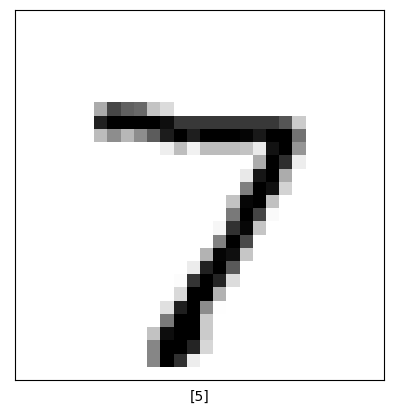

In [14]:
# Show one of the images from the test dataset
plt.xticks([])
plt.yticks([])
plt.xlabel([y_train[0]])
plt.imshow(x_test[0],cmap=plt.cm.binary)


# Plot metrics

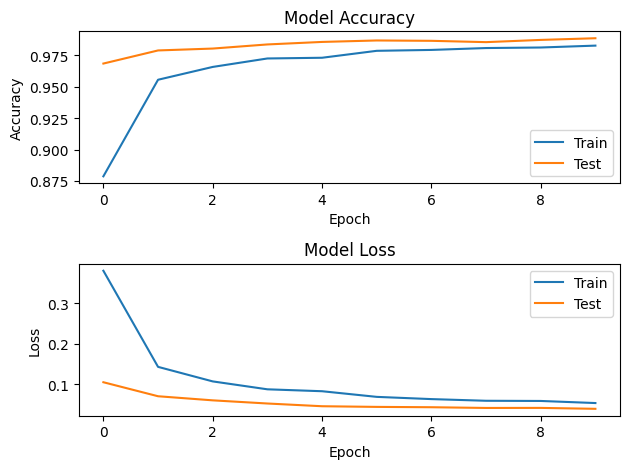

In [17]:
import os
import matplotlib.pyplot as plt

# Plotting the metrics like accuracy and loss
fig = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')

plt.subplot(2, 1, 2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

plt.tight_layout()
plt.show()

# Save the model in .h5 format (recommended for TensorFlow models)
model.save("mnist_model.h5")


In [18]:
#Define function to plot image with prediction
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format([predicted_label],
                                100*np.max(predictions_array),
                                [true_label]),
                                color=color)

#Define function to plot value array
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

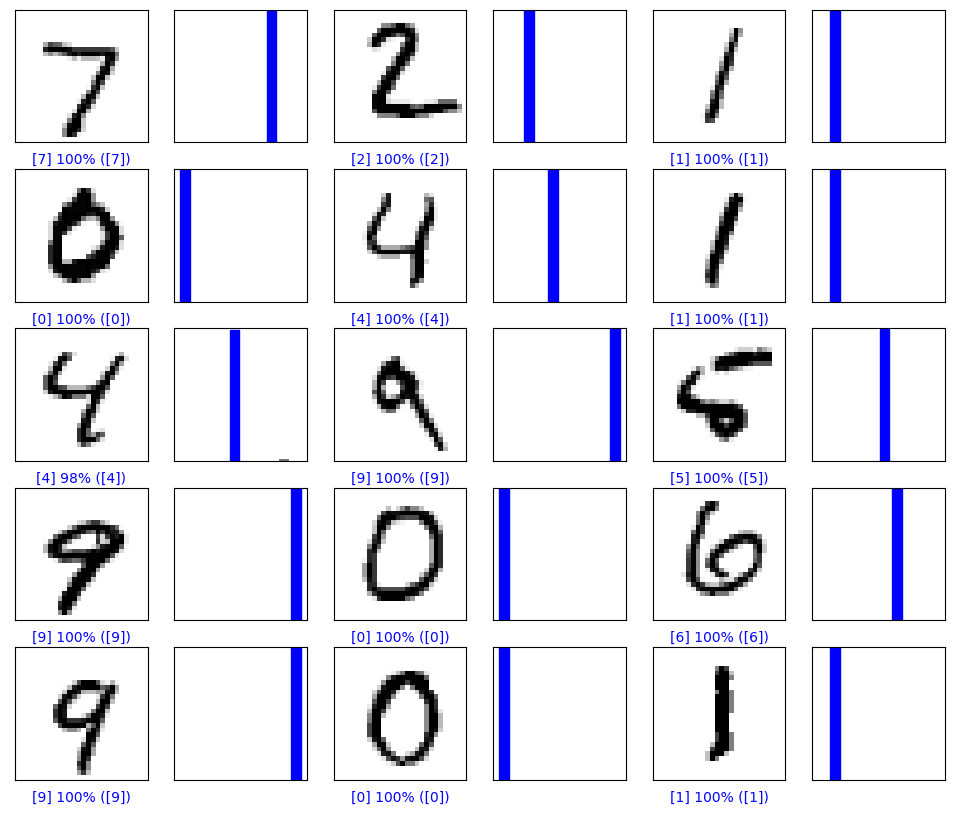

In [19]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
plt.show()

## Importing necessary libraries

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [21]:
# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest'
)
datagen.fit(x_train)


## Further Model Compilation and Training

In [22]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),  # Experiment with learning rates
              metrics=['accuracy'])

# Train the model using augmented data
model_log = model.fit(datagen.flow(x_train, y_train, batch_size=60), 
                      epochs=10, 
                      validation_data=(x_test, y_test), 
                      callbacks=[early_stopping])


Epoch 1/10


C:\Users\HARSHAL\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 60s 56ms/step - accuracy: 0.9040 - loss: 0.3135 - val_accuracy: 0.9899 - val_loss: 0.0293
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 53s 53ms/step - accuracy: 0.9495 - loss: 0.1666 - val_accuracy: 0.9882 - val_loss: 0.0306
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 54s 54ms/step - accuracy: 0.9553 - loss: 0.1447 - val_accuracy: 0.9901 - val_loss: 0.0277
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 50s 50ms/step - accuracy: 0.9593 - loss: 0.1347 - val_accuracy: 0.9911 - val_loss: 0.0253
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 54s 53ms/step - accuracy: 0.9635 - loss: 0.1179 - val_accuracy: 0.9921 - val_loss: 0.0235
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 51s 51ms/step - accuracy: 0.9644 - loss: 0.1173 - val_accuracy: 0.9906 - val_loss: 0.0254
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 51s 51ms/step - accuracy: 0.9660 - loss: 0.1115 - val_accuracy: 0.9917 - val_loss: 0.0227
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 51s 51ms/step - accuracy: 0.9673 - loss: 0.10

## Evaluating Model with a Confusion Matrix

In [28]:
# Predict and create confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


## Visualizing the Confusion Matrix

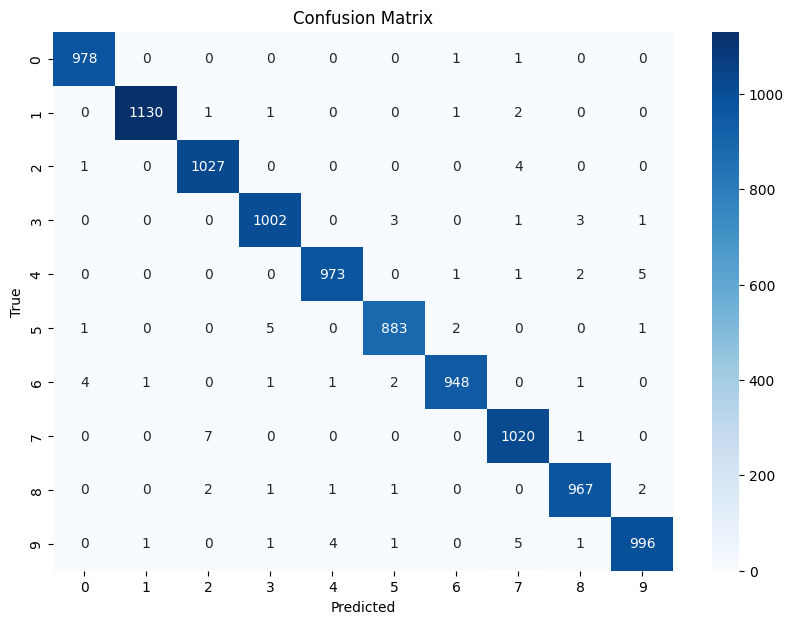

In [29]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## Saving the Enhanced Model

In [4]:
model.save('mnist_model_enhanced.h5')
